# Bank Stocks — End‑to‑End Analysis

This notebook is a **cleaned, reproducible** version of my finance project. It loads bank stock prices,
performs concise EDA (volatility, correlation, plots), computes **daily returns**, and saves artifacts
for downstream **risk backtesting** (e.g., VaR with Kupiec coverage).




### The Imports



In [17]:
from pandas_datareader import data, wb
# Imports for data handling and visualization
import pandas as pd
# Imports for data handling and visualization
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

 I will get stock information for the following banks for a period of ten years, between 2006 and 2016:
 
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
# for bank of america
import yfinance as yf
start=dt.datetime(2006,1,1)
end=dt.datetime(2016,1,1)
bac=data.DataReader('BAC','stooq',start,end)
#bac.tail(5)

In [3]:
# for citigroup
city=data.DataReader('C','stooq',start,end)
#city.tail(5)

In [4]:
# for goldman sachs
gold=data.DataReader('GS','stooq',start,end)
#gold.tail(5)

In [5]:
#for jp mporgan
jp=data.DataReader('JPM','stooq',start,end)
#jp.tail(5)

In [6]:
#for morgan stanely
morgan=data.DataReader('MS','stooq',start,end)
#morgan.tail(5)

In [7]:
#for wells fargo
wells=data.DataReader('WFC','stooq',start,end)
#wells.tail(5)

In [8]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [9]:
bank_stocks=pd.concat([bac,city,gold,jp,morgan,wells], axis=1, keys=tickers)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
df1=bank_stocks.unstack(level=-1)
df2=df1.xs('Close',level=1)
for i in range(6):
    a=tickers[i]
    print(a ," ", df2[a].max())

BAC   46.2013
C   466.812
GS   203.691
JPM   57.1634
MS   58.5624
WFC   47.0925


In [12]:
#Making a returns dataframe
returns=pd.DataFrame()

In [13]:
df1=bank_stocks.unstack(level=-1)
df2=df1.xs('Close',level=1)
for i in range(6):
    a=tickers[i]
# Compute daily percentage returns from prices (drop first NA row)
    returns[a + ' Return']=df2[a].pct_change()
#returns.head(10)    

/var/folders/8w/17wn656d6rqg4gxb9bcrxb300000gn/T/ipykernel_5414/3206216886.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns[a + ' Return']=df2[a].pct_change()


In [14]:
df3=returns.reset_index()
#df3.head(2)
df3[(df3['Date']>='2015-01-01') & (df3['Date']<='2015-12-31')].std()

Date          104 days 20:04:55.551720886
BAC Return                       0.016149
C Return                          0.01528
GS Return                        0.014028
JPM Return                       0.013964
MS Return                        0.016006
WFC Return                       0.012545
dtype: object

In [15]:
#returns.head(10)

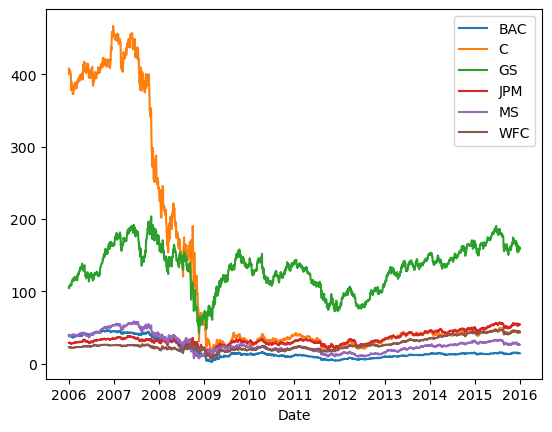

In [20]:
#Plotting the close price of each bank
df11=bank_stocks.unstack(level=-1)
df11
df4=df1.xs('Close',level=1)
for i in range(6):
    a=tickers[i]
    sns.lineplot(data=df4[a], label=a)
plt.show()

## Moving Averages


** Rolling 30 day average against the Close Price for wells fargo stock for the year 2008**

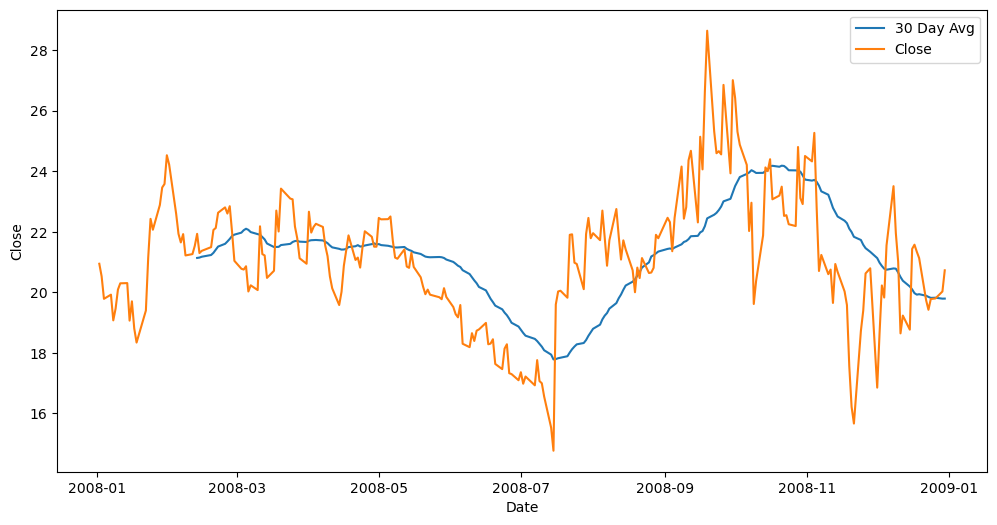

In [21]:
#30 day average against the closing price for wells fargo
plt.figure(figsize=(12,6))

a=bank_stocks.reset_index()
df5=a[(a['Date']>='2008-01-01') & (a['Date']<='2008-12-30')]        
df6=df5.set_index('Date')['WFC']['Close']
sns.lineplot(df5.set_index('Date')['WFC']['Close'].rolling(window=30).mean(), label='30 Day Avg')
sns.lineplot(df6, label='Close')
plt.show()


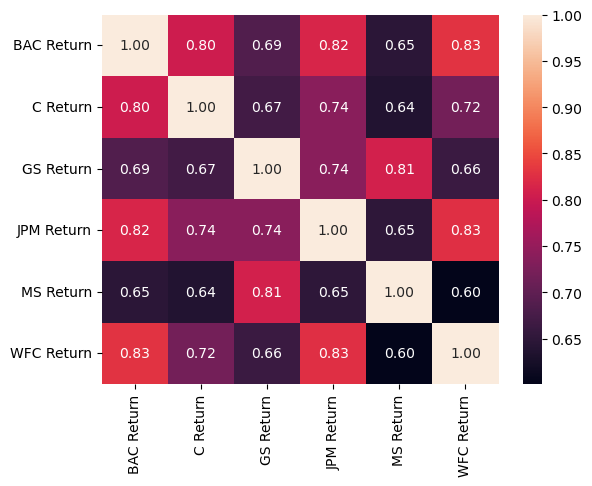

In [23]:
#heatmap showing the correlation
returns_subset=bank_stocks.xs(key='Close',axis=1, level='Stock Info')
# Correlation heatmap of daily returns to assess co-movement across tickers
sns.heatmap(returns.corr(), annot=True, fmt='.2f')
#returns_subset.head(10)
plt.show()
import matplotlib.pyplot as plt
plt.tight_layout()
#plt.savefig('figs/heatmap_41965675.png', dpi=180)

In [24]:
# Save artifacts for reuse in risk backtests
if 'returns' in globals() and isinstance(returns, pd.DataFrame):
# Persist returns so downstream risk backtests (VaR) can reuse them reproducibly
    returns.sort_index().to_csv('returns.csv')
    print('Saved returns.csv', returns.shape)
else:
    print('No `returns` DataFrame found to save.')

if 'bank_stocks' in globals() and isinstance(bank_stocks, pd.DataFrame):
# Persist cleaned prices for reproducibility
    bank_stocks.sort_index().to_csv('prices.csv')
    print('Saved prices.csv', bank_stocks.shape)
elif 'prices' in globals() and isinstance(prices, pd.DataFrame):
# Persist cleaned prices for reproducibility
    prices.sort_index().to_csv('prices.csv')
    print('Saved prices.csv', prices.shape)

Saved returns.csv (2517, 6)
Saved prices.csv (2517, 30)
